## Import Data ##

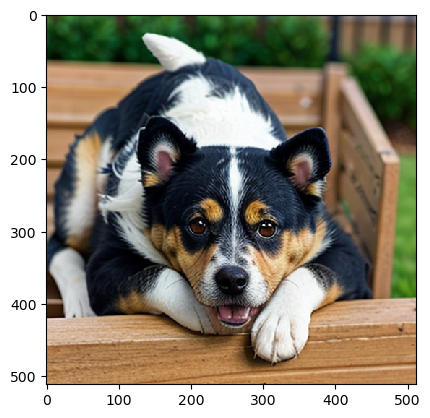

(1000, 512, 512, 3)

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob
import cv2

images1 = [cv2.imread(file) for file in glob.glob("animals/cat/*.png")]
images2 = [cv2.imread(file) for file in glob.glob("animals/dog/*.png")]
images = images1+images2

df = np.array(images)
plt.imshow(df[500][:, :, (2, 1, 0)], interpolation='nearest')
plt.show()
df.shape

In [9]:
size = int(df.size/len(df))
df = df.reshape(-1,size)
df = pd.DataFrame(df)

In [11]:
df['Animal'] = ['cat' if i < 500 else 'dog' for i in range(len(df))]
df

,0,1,2,3,4,5,6,7,8,9,...,786423,786424,786425,786426,786427,786428,786429,786430,786431,Animal
0,158,167,195,157,167,195,157,167,194,156,...,154,175,208,143,164,196,142,160,185,cat
1,31,44,57,30,43,57,31,43,56,32,...,144,172,201,147,178,205,141,167,192,cat
2,56,67,92,54,69,99,83,97,124,102,...,114,134,148,120,141,155,122,139,152,cat
3,150,157,161,150,157,160,149,155,159,148,...,65,73,102,68,78,107,80,87,111,cat
4,48,71,104,44,71,105,44,70,103,45,...,132,155,177,143,164,183,151,166,183,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,249,247,236,252,246,239,253,248,239,252,...,131,141,152,131,145,155,150,161,171,dog
996,209,205,200,212,204,200,211,204,198,210,...,140,156,173,141,157,175,143,158,173,dog
997,122,143,167,122,144,170,122,144,169,124,...,83,126,122,82,126,123,79,115,114,dog
998,207,208,209,208,207,209,207,208,208,207,...,11,9,54,10,9,56,18,22,60,dog


In [13]:
X = df.drop(columns=["Animal"])
y = df["Animal"]

## Data Clean Up ##

In [10]:
from sklearn.preprocessing import StandardScaler

object = StandardScaler()
df = object.fit_transform(X)

## Data Analysis ##

## Data Optimization ##

In [ ]:
import numpy as np

a = 1
z = 3 #When dealing with the last column type the column #+1, (who tf knows why but it works)
d = df.iloc[0:388, a:z] #[Rows, Columns]
f = np.array([[12, 3, 4], [5, 1, 2]]) #Matrix
vec_df = np.dot(d, 3) #Operations to weight data

#re-inserting weighted data back into the dataset
v = pd.DataFrame(vec_df, columns = df.columns[a:z].tolist())
df.update(v)

In [ ]:
#Undo previous operation
a = 0
z = 2
d = df.iloc[0:3, a:z] #[Rows, Columns]
f = np.array([[12, 3, 4], [5, 1, 2]]) #Matrix
vec_df = np.dot(d, 1/f) #Operations to weight data

In [ ]:
df

## Fine-Tuning ##

## Training and Testing ##

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

model1 = RandomForestClassifier(max_depth = 18, min_samples_leaf = 1, min_samples_split = 2).fit(X_train, y_train)

predictions = model1.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.5:
    joblib.dump(model1, "test1.joblib")
    model = joblib.load("test1.joblib")

Accuracy: 0.8366666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import joblib

model2 = DecisionTreeClassifier(max_depth = 18, min_samples_leaf = 1, min_samples_split = 2).fit(X_train, y_train)

predictions = model2.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.5:
    joblib.dump(model2, "test2.joblib")
    model = joblib.load("test2.joblib")

In [322]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

model3 = KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train)

score = model3.score(X_train, y_train)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.5:
    joblib.dump(model3, "test4.joblib")
    model = joblib.load("test4.joblib")

Accuracy: 0.834


In [189]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid = parameter, cv = kf, verbose = 1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 15}


In [344]:
from sklearn import svm
import joblib

model5 = svm.SVC().fit(X_train, y_train)

predictions = model5.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.5:
    joblib.dump(model5, "test3.joblib")
    model = joblib.load("test3.joblib")

Accuracy: 0.788


## Predicted vs Actual ##

In [14]:
from PIL import Image
import numpy as np

img = Image.open("dawg.png")
img_resize = img.resize((512,512))
im = np.array(img_resize).reshape(1,-1)

In [ ]:
object = StandardScaler()
im_norm = object.fit_transform(im) 

In [16]:
import joblib

model = joblib.load("test1.joblib")

In [18]:
predictions = model.predict(im)
print(predictions)

['dog']


In [20]:
img = Image.open("cat2.png")
img_resize = img.resize((512,512))
im = np.array(img_resize).reshape(1,-1)

In [22]:
predictions = model.predict(im)
print(predictions)

['cat']


In [55]:
y_predicted = model.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[133,  17],
       [ 32, 118]])

Text(95.72222222222221, 0.5, 'Actual')

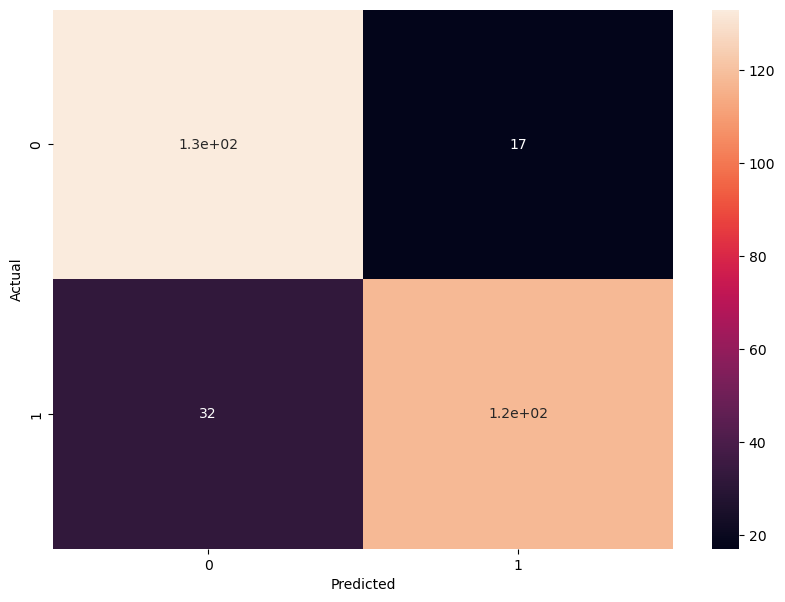

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")